<p align="center">
    <img src="https://proctoprime.com.br/wp-content/uploads/2024/04/Endometriose-intestinal.jpg" alt="Descrição da imagem" width="400"/>
</p>


## About Dataset
This dataset contains 10,000 instances of synthetic but realistic data aimed at aiding research and development in predicting and understanding endometriosis. It is structured to reflect common features and symptoms associated with the condition, making it suitable for training machine learning models. The dataset ensures logical relationships among features to improve model interpretability and predictive power.


#### Features:
Age: Age of the individual (18–50 years).

Menstrual_Irregularity: Indicates whether the individual experiences irregular menstruation (0 = No, 1 = Yes).

Chronic_Pain_Level: Pain severity reported by the individual, on a scale of 0 to 10 (higher indicates more severe pain).

Hormone_Level_Abnormality: Indicates abnormalities in hormone levels (0 = Normal, 1 = Abnormal).

Infertility: Indicates if the individual experiences infertility (0 = No, 1 = Yes).

BMI: Body Mass Index, ranging from 15 to 40.

Diagnosis: Target variable (0 = No endometriosis, 1 = Endometriosis present).

##### Key Highlights:
Logical Structure: The dataset incorporates realistic relationships, such as the correlation between irregular menstruation, chronic pain, and diagnosis likelihood.
Balanced Representation: Designed to ensure meaningful variance in feature distributions for robust model training.
Versatility: Suitable for various tasks, including classification, feature engineering, and exploratory data analysis (EDA).

##### Use Cases:
Developing predictive models for endometriosis diagnosis.
Conducting exploratory analysis of symptoms and their relationships.
Testing and validating feature engineering techniques or algorithms.

source: https://www.kaggle.com/datasets/michaelanietie/endometriosis-dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("structured_endometriosis_data.csv")
df

,Age,Menstrual_Irregularity,Chronic_Pain_Level,Hormone_Level_Abnormality,Infertility,BMI,Diagnosis
0,24,1,8.361531,0,0,19.451314,0
1,37,1,4.995508,0,0,22.388436,0
2,46,1,3.363996,1,0,21.320443,0
3,32,1,5.246037,0,0,20.177715,1
4,28,1,3.898932,1,0,23.538103,1
...,...,...,...,...,...,...,...
9995,37,1,3.153169,1,0,18.318849,0
9996,44,0,4.044800,1,1,24.732344,0
9997,39,0,5.096384,1,1,34.204883,1
9998,47,1,7.598862,1,1,30.374964,1


#### Após a leitura dos dados, a inteligência artificial sugeriu um plano de análise estruturado, incluindo: limpeza e entendimento dos dados, análise exploratória (EDA) e, se aplicável, a construção de um modelo preditivo para diagnóstico que é o que vamos seguir de fato com essa analise:

### 📌 Passo 1: Entendimento dos Dados

In [3]:
# Verificar valores ausentes
print(df.isnull().sum())

# Verificar tipos de dados
print(df.dtypes)

Age                          0
Menstrual_Irregularity       0
Chronic_Pain_Level           0
Hormone_Level_Abnormality    0
Infertility                  0
BMI                          0
Diagnosis                    0
dtype: int64
Age                            int64
Menstrual_Irregularity         int64
Chronic_Pain_Level           float64
Hormone_Level_Abnormality      int64
Infertility                    int64
BMI                          float64
Diagnosis                      int64
dtype: object


In [4]:
# Estatísticas gerais
df.describe()

,Age,Menstrual_Irregularity,Chronic_Pain_Level,Hormone_Level_Abnormality,Infertility,BMI,Diagnosis
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,33.692300,0.697500,5.030619,0.591100,0.298300,23.052865,0.407900
std,9.205308,0.459364,1.983955,0.491655,0.457535,3.891615,0.491469
min,18.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000
25%,26.000000,0.000000,3.671697,0.000000,0.000000,20.329327,0.000000
50%,34.000000,1.000000,5.035825,1.000000,0.000000,23.036315,0.000000
75%,42.000000,1.000000,6.396854,1.000000,1.000000,25.712923,1.000000
max,49.000000,1.000000,10.000000,1.000000,1.000000,37.146127,1.000000


### 📌 Passo 2: Análise Exploratória (EDA - Exploratory Data Analysis)

##### 2.1 Distribuição das variáveis

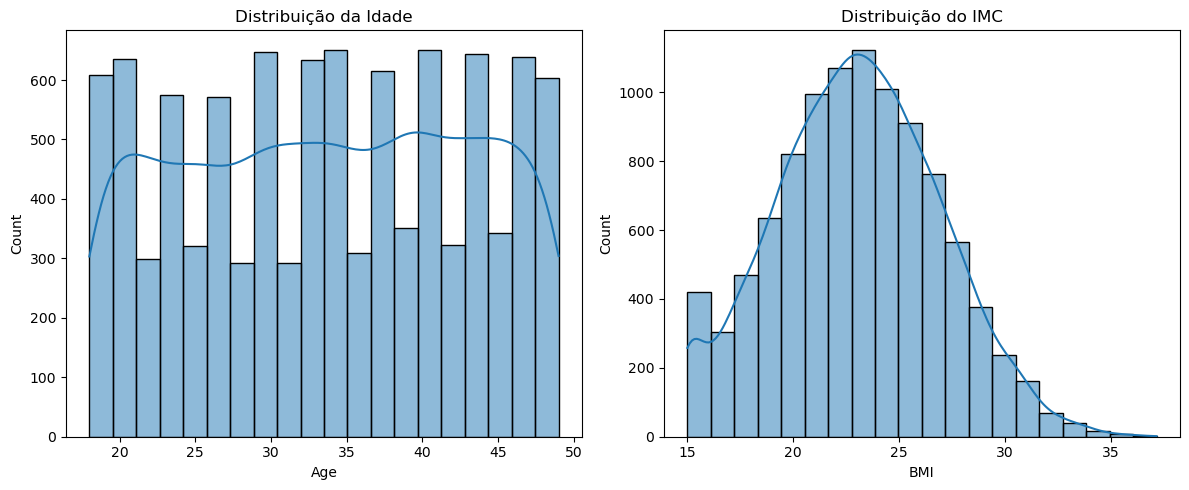

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criando subplots (1 linha, 2 colunas)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Define o tamanho da figura

# Distribuição da Idade
sns.histplot(df["Age"], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Distribuição da Idade")

# Distribuição do BMI
sns.histplot(df["BMI"], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Distribuição do IMC")

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()


##### 2.2 Comparação entre grupos (com e sem endometriose)

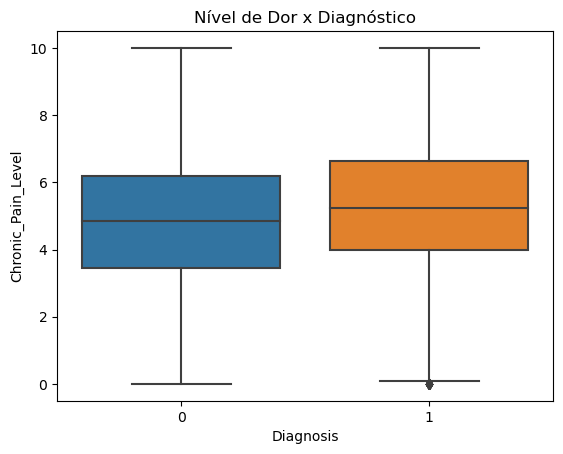

In [6]:
# Comparação do nível de dor entre os grupos
sns.boxplot(x="Diagnosis", y="Chronic_Pain_Level", data=df)
plt.title("Nível de Dor x Diagnóstico")
plt.show()

In [7]:
# Comparação de irregularidade menstrual
pd.crosstab(df["Menstrual_Irregularity"], df["Diagnosis"], normalize="index") * 100

Diagnosis,0,1
Menstrual_Irregularity,,
0,66.314050,33.685950
1,56.129032,43.870968


### 📌 Passo 3: Modelo Preditivo

##### 3.1 Preparação dos dados

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecionar variáveis independentes e alvo
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

# Separar dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar dados numéricos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### 3.2 Treinando um modelo simples Regressão

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Criar e treinar o modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliação do modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Acurácia: 0.6355
              precision    recall  f1-score   support

           0       0.67      0.81      0.73      1220
           1       0.55      0.37      0.44       780

    accuracy                           0.64      2000
   macro avg       0.61      0.59      0.59      2000
weighted avg       0.62      0.64      0.62      2000



#### Análise do desempenho do  modelo:  

📌 **Acurácia: 63.55%**  
- O modelo acerta **~63.5%** dos diagnósticos, o que não é muito alto para um problema de saúde.  

📌 **Métricas por classe:**  
- **Classe 0 (Sem Endometriose)**:  
  - **Precision (67%)**: Quando o modelo prevê "não tem endometriose", ele está certo em **67%** dos casos.  
  - **Recall (81%)**: Consegue encontrar **81%** das pessoas realmente sem endometriose.  
  - **F1-Score (73%)**: Equilíbrio entre precisão e recall.  

- **Classe 1 (Com Endometriose)**:  
  - **Precision (55%)**: Quando prevê "tem endometriose", acerta **55%** das vezes.  
  - **Recall (37%)**: O modelo só identifica **37%** das pessoas realmente com endometriose. Isso é um problema, pois muitos casos podem passar despercebidos.  
  - **F1-Score (44%)**: Baixo, indicando que a classe 1 não está sendo bem identificada.  

📌 **Problema principal:**  
- O modelo está **desequilibrado** e tem dificuldade em identificar casos positivos de endometriose (`recall de 37%`).  
- Pode estar sendo influenciado pelo **desbalanceamento da base** (mais casos negativos que positivos).  

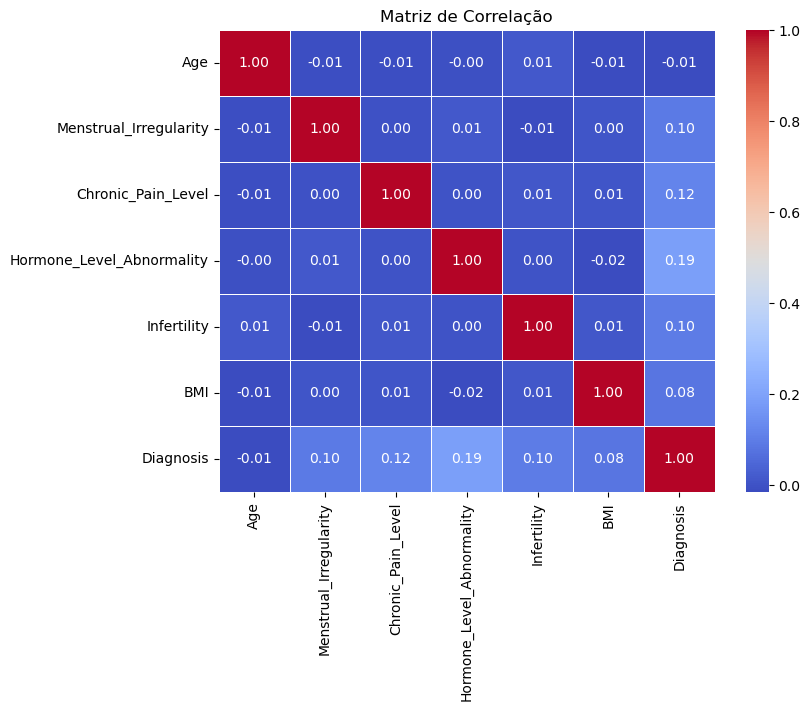

In [12]:
# correlação
correlation = df.corr()

# heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

### ⚕️ conclusão

#### Pelo heatmap, podemos ver a **correlação entre as variáveis e o diagnóstico de endometriose (`Diagnosis`)**. Aqui estão algumas observações:  

📌 **Variáveis com maior correlação com `Diagnosis`:**  
- **Hormone_Level_Abnormality (0.19)** → Maior correlação positiva, indicando que anormalidades hormonais podem estar mais associadas ao diagnóstico de endometriose.  
- **Chronic_Pain_Level (0.12)** → A dor crônica também tem uma correlação moderada com a endometriose.  
- **Menstrual_Irregularity e Infertility (~0.10)** → Têm uma correlação leve com o diagnóstico.  

📌 **Variáveis com menor impacto direto:**  
- **Age, BMI** → A correlação é muito baixa (~-0.01 e 0.08), sugerindo que essas variáveis não influenciam tanto no diagnóstico.  

O valor da correlação vai de **-1 a 1**:  
- Próximo de **1 ou -1** = forte relação.  
- Próximo de **0** = pouca ou nenhuma relação.  

Aqui, os valores obtidos ainda são relativamente baixos, indicando que o modelo pode não estar capturando bem os padrões dos dados. Isso sugere a necessidade de uma abordagem mais refinada, incluindo uma **melhoria na preparação da base**, uma **limpeza mais aprofundada** e a **exploração de modelos de machine learning mais robustos**. Além disso, técnicas como balanceamento de classes e engenharia de variáveis podem contribuir para um diagnóstico mais preciso.